# Sentiment Analysis of QRIS in Twitter

This notebook is dedicated to exploratory data analysis (EDA) on the preprocessed tweets. The aim is to extract insights and understand the underlying patterns in the data. This involves visualizing sentiment distributions, word frequencies, and other relevant statistical measures. By examining these aspects, we can gain a deeper understanding of the data's characteristics and identify any trends or anomalies.

In [1]:
import re
import pandas as pd
import numpy as np
import datetime as dt
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Load dataframe
df = pd.read_csv('preprocessed_final.csv')
df

,created_at,Komentar,Sentiment,Score,month_year,clean_text,final_text,token,stop_text,stem_text
0,2023-03-08 04:10:06+00:00,"@ikanmokpoo mjb, mau transaksi apa Kak? Aku tr...",positive,5.016.244.649.887.080,2023-03,mjb transaksi kak transaksi bayar pake qris td...,mjb transaksi kak transaksi bayar pakai qris t...,"['mjb', 'transaksi', 'kak', 'transaksi', 'baya...","['transaksi', 'transaksi', 'bayar', 'qris', 'a...",transaksi transaksi bayar qris aman lancar jaya
1,2023-03-05 10:48:34+00:00,@BNICustomerCare ini kenapa dari dulu setiap m...,negative,989.467.442.035.675,2023-03,transaksi qris via bni ga ya min scan barcode ...,transaksi qris melalui bni tidak ya minimal sc...,"['transaksi', 'qris', 'melalui', 'bni', 'tidak...","['transaksi', 'qris', 'minimal', 'scan', 'barc...",transaksi qris minimal scan barcode otomatis c...
2,2023-03-17 04:21:57+00:00,"@tanyakanrl Keuntungannya praktis, tinggal swi...",positive,8.306.553.959.846.490,2023-03,keuntunganya praktis tingal swipe up homescren...,keuntunganya praktis tinggal swipe up homescre...,"['keuntunganya', 'praktis', 'tinggal', 'swipe'...","['keuntunganya', 'praktis', 'tinggal', 'swipe'...",keuntunganya praktis tinggal swipe homescrenlo...
3,2023-03-03 16:20:59+00:00,"@leeehovo @discountfess mau tanya kak, di pert...",neutral,9.959.661.960.601.800,2023-03,kak pertamina bayar mengunakan qris nga,kak pertamina bayar mengunakan qris tidak,"['kak', 'pertamina', 'bayar', 'mengunakan', 'q...","['pertamina', 'bayar', 'mengunakan', 'qris']",pertamina bayar mengunakan qris
4,2023-08-21 11:39:04+00:00,Udah 4x gw transaksi di alfa bahkan alfa yg ad...,negative,996.809.422.969.818,2023-08,udah gw transaksi alfa alfa yg beda kota gagal...,sudah saya transaksi alfa alfa yang beda kota ...,"['sudah', 'saya', 'transaksi', 'alfa', 'alfa',...","['transaksi', 'alfa', 'alfa', 'beda', 'kota', ...",transaksi alfa alfa beda kota gagal ros qris m...
...,...,...,...,...,...,...,...,...,...,...
7709,2024-06-24 04:55:11+00:00,haii haii kyu ada saldo receh nominal rahasia ...,neutral,9.753.036.499.023.430,2024-06,hai kyu saldo receh nominal rahasia ba qris ru...,hai ada saldo receh nominal rahasia akun bisni...,"['hai', 'ada', 'saldo', 'receh', 'nominal', 'r...","['nominal', 'rahasia', 'akun', 'bisnis', 'qris...",nominal rahasia akun bisnis qris rulesnya twet...
7710,2024-06-24 06:10:37+00:00,Banyak orang gatau kalau nyari duit itu segamp...,neutral,8.691.744.804.382.320,2024-06,orang gatau nyari duit segampang main slot gac...,orang tidak tahu mencari uang segampang main s...,"['orang', 'tidak', 'tahu', 'mencari', 'uang', ...","['orang', 'mencari', 'uang', 'segampang', 'mai...",orang cari uang gampang main gacor paris modal...
7711,2024-06-24 06:23:05+00:00,Di aku ready nih kak! Murce murce all e-wallet...,neutral,9.926.472.902.297.970,2024-06,ready nih kak murce al ewalet qris dm or wa,siap ini kak murah al ewalet qris direct messa...,"['siap', 'ini', 'kak', 'murah', 'al', 'ewalet'...","['murah', 'al', 'ewalet', 'qris', 'direct', 'm...",murah al ewalet qris direct message
7712,2024-06-24 07:09:20+00:00,mau netflix 1 bulan yg bs qris #zonauang,neutral,99.673.330.783.844,2024-06,netflix yg bs qris,netflix yang bisa qris,"['netflix', 'yang', 'bisa', 'qris']","['netflix', 'qris']",netflix qris


# Chart

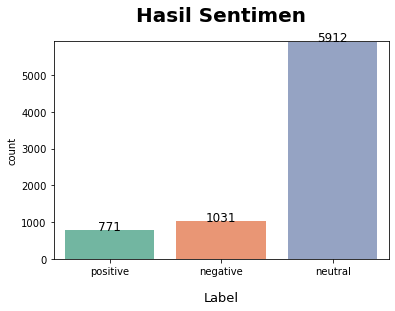

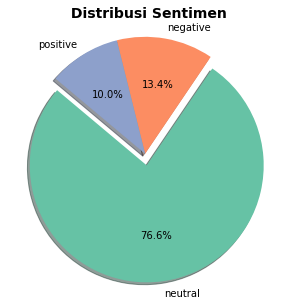

In [3]:
# membuat visualisasi bar chart untuk menampilkan jumlah sentimen netral, positif dan negatif

# Warna yang sama untuk kedua grafik
colors = sns.color_palette("Set2", 3) # Warna untuk Netral, Positif, Negatif

# Membuat bar chart
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(x='Sentiment', data=df, palette=colors)

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.25, rect.get_height(), horizontalalignment='center', fontsize=12)

plt.title("Hasil Sentimen", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Label", fontsize=13, labelpad=15)
plt.ylim(0, max(df['Sentiment'].value_counts()) + 5)
plt.show()

# Define data for the pie chart
# Get the value counts of sentiment labels in your DataFrame
sentiment_counts = df['Sentiment'].value_counts().to_dict()
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
explode = (0.1, 0, 0)  # Explode the 1st slice (Positive)

# Create a pie chart
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(" Distribusi Sentimen", fontsize=14, fontweight='bold')
plt.show()

# Sentimen over time (per month)

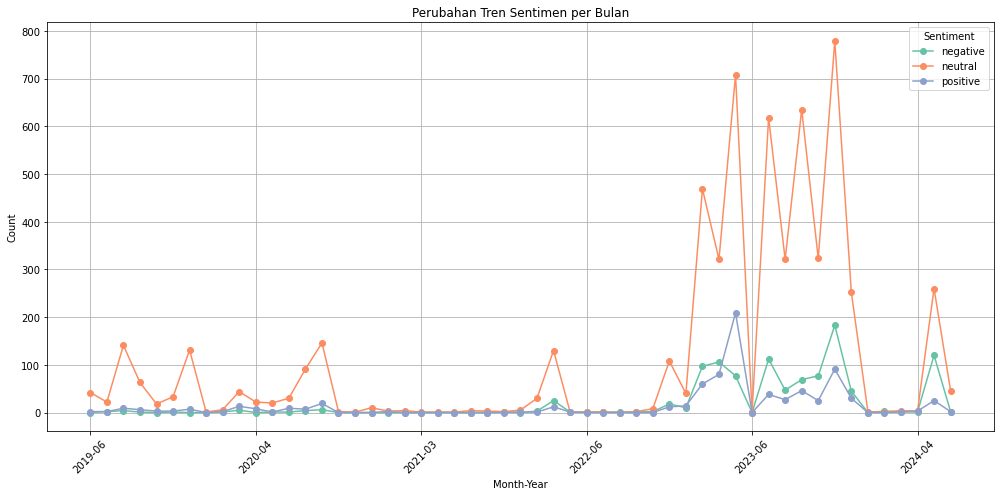

In [4]:
# Remove timezone information and convert to month-year period
df['created_at'] = pd.to_datetime(df['created_at']).dt.tz_localize(None)
df['month_year'] = df['created_at'].dt.to_period('M').astype(str)

# Ensure the Sentiment column is treated as a categorical variable
df['Sentiment'] = df['Sentiment'].astype('category')

# Group by month_year and sentiment, and count occurrences
sentiment_trend = df.groupby(['month_year', 'Sentiment']).size().unstack(fill_value=0)

# Plot the sentiment trend
plt.figure(figsize=(14, 7))
colors = sns.color_palette("Set2", 3)
sentiment_trend.plot(kind='line', marker='o', color=colors, ax=plt.gca())

plt.title('Perubahan Tren Sentimen per Bulan')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Wordcloud

In [5]:
def generate_wordcloud(sentiment, df):
    # Filter out NaN values and convert to string
    sentiment_text = ' '.join([str(review) for review in df['stem_text'][df['Sentiment'] == sentiment].dropna()])

    # Define additional stopwords
    additional_stopwords = {'transaksi', 'bayar', 'pake', 'pakai','tunai', 'dbank', 'banget', 'surabaya', 'ims', 'danamon', 'infinite','nya','ribu'}

    # Combine with default stopwords
    stopwords = STOPWORDS.union(additional_stopwords)

    # Create WordCloud object
    wordcloud = WordCloud(background_color="white", stopwords=stopwords,
                          width=800, height=400, max_font_size=200).generate(sentiment_text)

    # Plotting
    plt.figure(figsize=(14, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

## Wordcloud Positive

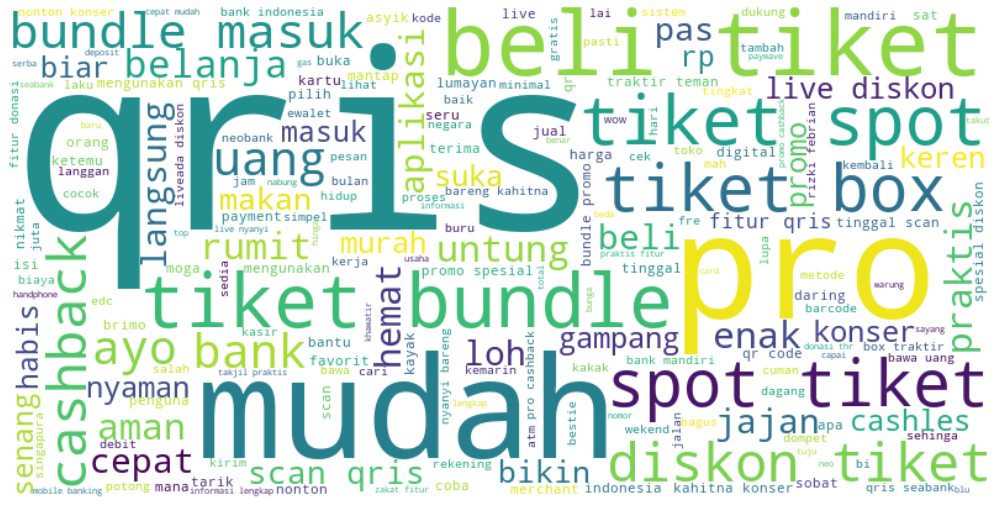

In [141]:
generate_wordcloud('positive', df)

## Wordcloud Neutral

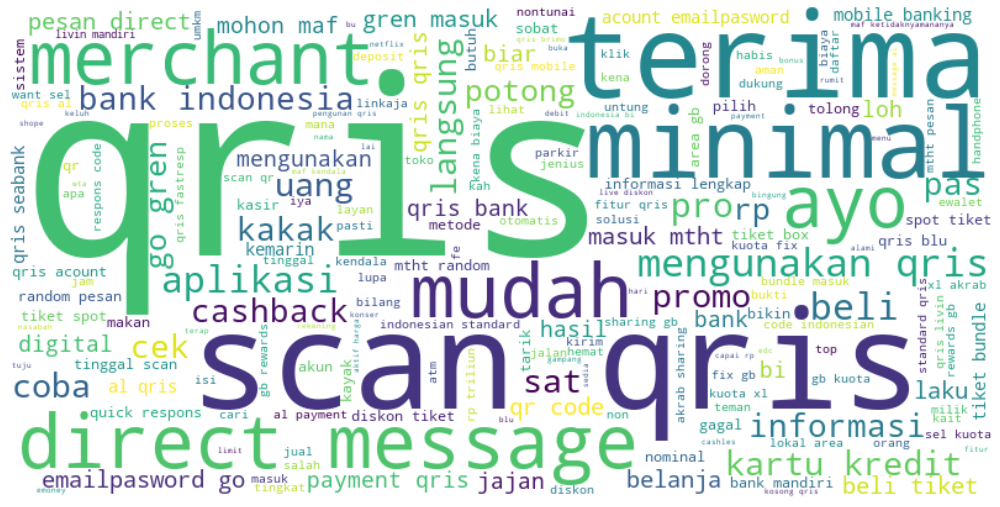

In [142]:
generate_wordcloud('neutral', df)

## Wordcloud Negative

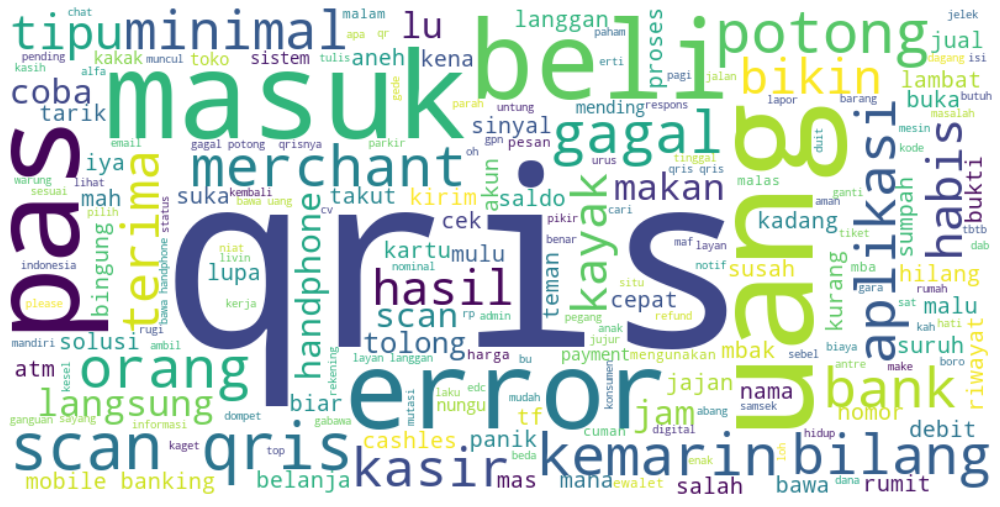

In [139]:
generate_wordcloud('negative', df)

# Top 20 Words

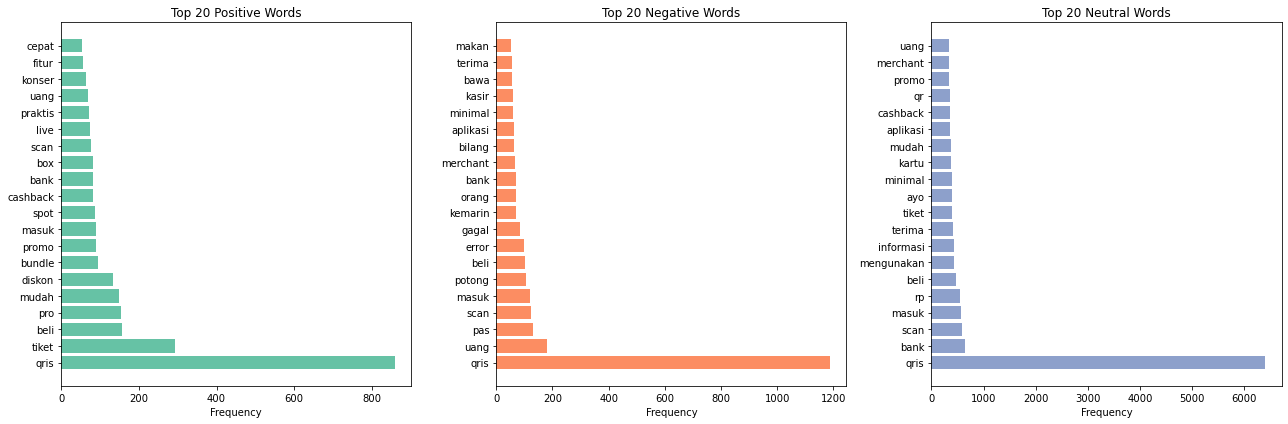

In [137]:
def top_words(sentiment, df, num_words=20):
    # Filter out NaN values and convert to string
    sentiment_text = ' '.join([str(review) for review in df['stem_text'][df['Sentiment'] == sentiment].dropna()])

    # Tokenize the text into words
    words = sentiment_text.split()

    # Exclude specific words
    exclude_words = {'transaksi', 'bayar', 'pake', 'pakai','tunai', 'dbank', 'banget', 'surabaya', 'ims', 'danamon', 'infinite','nya','ribu'}
    words = [word for word in words if word not in exclude_words]

    # Count word frequencies
    word_freq = Counter(words)

    # Get the top 'num_words' most common words
    top_words = word_freq.most_common(num_words)

    return top_words

top_positive = top_words('positive', df)
top_negative = top_words('negative', df)
top_neutral = top_words('neutral', df)

# Extracting data for plotting
labels_pos = [word[0] for word in top_positive]
freqs_pos = [word[1] for word in top_positive]

labels_neg = [word[0] for word in top_negative]
freqs_neg = [word[1] for word in top_negative]

labels_neu = [word[0] for word in top_neutral]
freqs_neu = [word[1] for word in top_neutral]

# Using seaborn color palette "Set2"
sns.set_palette(sns.color_palette("Set2", 3))

# Plotting the bar charts for each sentiment category
plt.figure(figsize=(18, 6))

# Plotting positive sentiment
plt.subplot(1, 3, 1)
plt.barh(labels_pos, freqs_pos, color=sns.color_palette()[0])
plt.xlabel('Frequency')
plt.title('Top 20 Positive Words')

# Plotting negative sentiment
plt.subplot(1, 3, 2)
plt.barh(labels_neg, freqs_neg, color=sns.color_palette()[1])
plt.xlabel('Frequency')
plt.title('Top 20 Negative Words')

# Plotting neutral sentiment
plt.subplot(1, 3, 3)
plt.barh(labels_neu, freqs_neu, color=sns.color_palette()[2])
plt.xlabel('Frequency')
plt.title('Top 20 Neutral Words')

plt.tight_layout()
plt.show()
